# Time series plot of COVID-19 cummulative confirmed cases by country

Hiroshi Maruyama (Twitter: @maruyama)

## Log plot of confirmes cases

Data source: Johns Hopkins University Center for Systems Science and Engineering ([GitHub](https://github.com/CSSEGISandData/COVID-19), [Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6))


last_date = 5/6/20


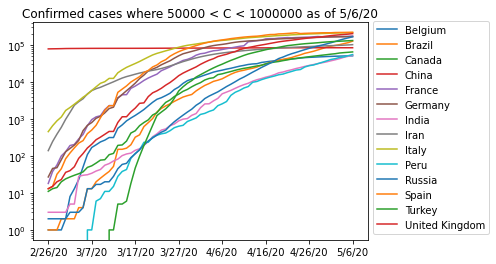

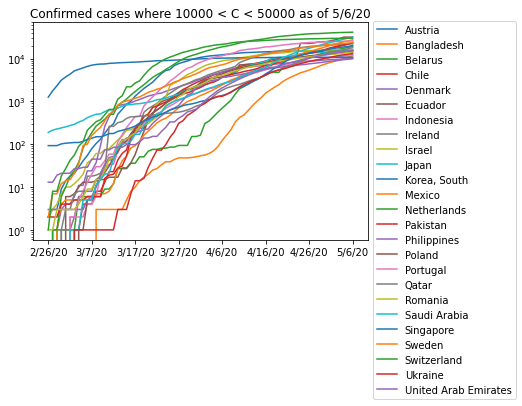

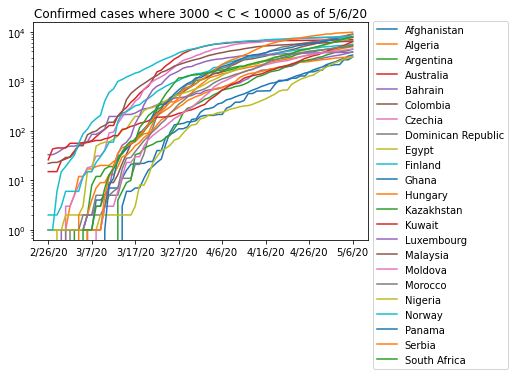

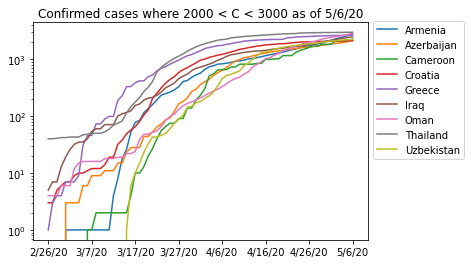

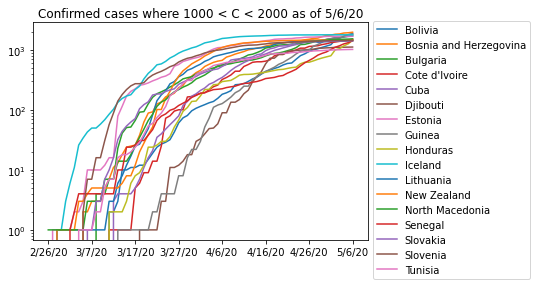

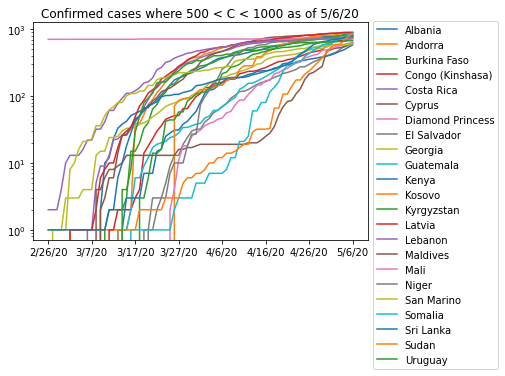

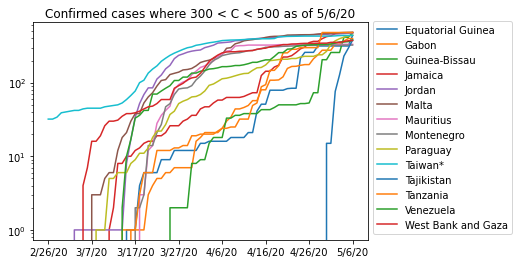

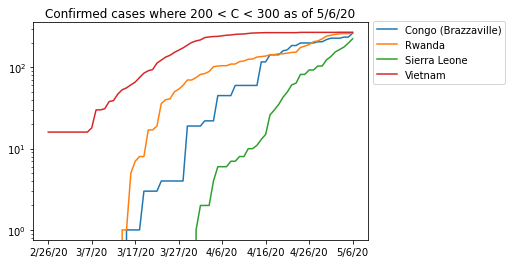

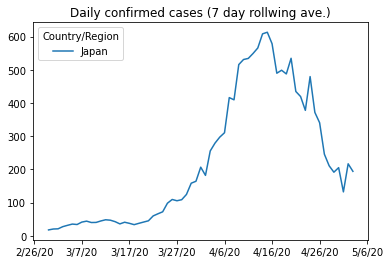

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def read_csse(fn):
    csse_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
    df = pd.read_csv(csse_path + fn)
    df = df.drop(columns=["Lat", "Long"])
    df =df.groupby("Country/Region").sum()
    return df

# Note that the data is cummulative
df_cases = read_csse('time_series_covid19_confirmed_global.csv')
df_deaths = read_csse('time_series_covid19_deaths_global.csv')
    
last_date = df_cases.columns[-1]
print("last_date =", last_date)

def plot_log_confirmed(min, max):
    t = df_cases[(min <= df_cases[last_date]) & (df_cases[last_date] < max)  ].T
    title = "Confirmed cases where {} < C < {} as of {}".format(min, max, last_date)
    t[35:].plot(logy=True, title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
    plt.show()

window = 7
def plot_daily_reported(countries=["Japan"]):
    t = df_cases.loc[countries].T.diff()
    title = "Daily confirmed cases ({} day rollwing ave.)".format(window)
    t[35:].rolling(window, center=True).mean().plot(title=title)
    
plot_log_confirmed(50000, 1000000)
plot_log_confirmed(10000,   50000)
plot_log_confirmed( 3000,   10000)
plot_log_confirmed( 2000,    3000)
plot_log_confirmed( 1000,    2000)
plot_log_confirmed(  500,    1000)
plot_log_confirmed(  300,     500)
plot_log_confirmed(  200,     300)

# plot_daily_reported(countries = ["Japan", "France", "Germany", "Korea, South", "US", "United Kingdom", "Taiwan*"])
plot_daily_reported()

## Daily growth rate of reported case by country

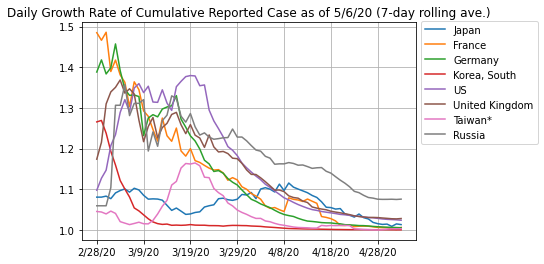

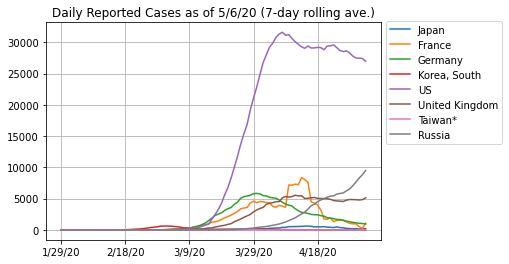

In [2]:
# 日次拡大率（7日間の移動平均）をプロット
# Daily growth rate of cumulative reported case by country (moving average of windows size = 7)
countries = ["Japan", "France", "Germany", "Korea, South", "US", "United Kingdom", "Taiwan*", "Russia"]
# countries = ("Japan", "France", "Germany", "US", "Singapore", "United Kingdom", "Spain", "Switzerland")
window = 7
daily_r = df_cases.T.pct_change() + 1.0
# daily_r.iloc[30:].loc[:, countries].rolling(window, center=True).mean().iloc[window:].plot(title="Daily Reproduction Rate by Country (Window size={})".format(window))

data_to_plot = np.exp(np.log(daily_r.iloc[30:].loc[:, countries]).rolling(window, center=True).mean().iloc[window:])
title = "Daily Growth Rate of Cumulative Reported Case as of {} ({}-day rolling ave.)".format(last_date, window)
data_to_plot.plot(title=title, grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
# data_to_plot

daily_cases = df_cases.loc[countries].T.diff()
data_to_plot = daily_cases.rolling(window, center=True).mean().iloc[window:]
title = "Daily Reported Cases as of {} ({}-day rolling ave.)".format(last_date, window)
data_to_plot.plot(title=title, grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

## Daily reported cases and reported death

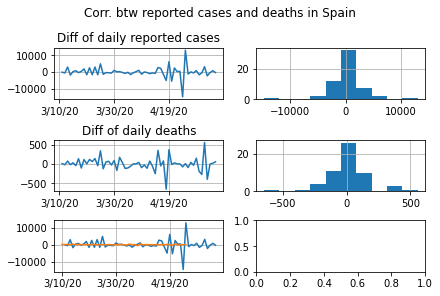

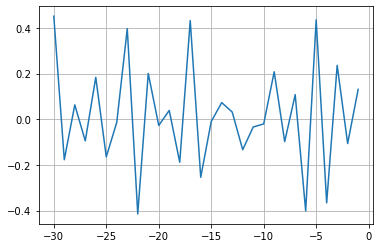

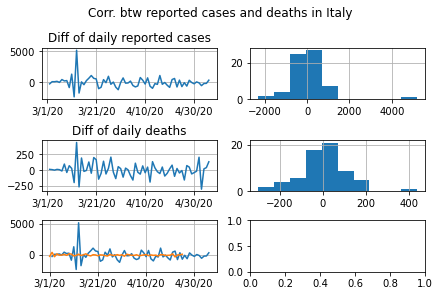

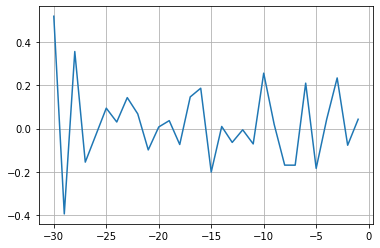

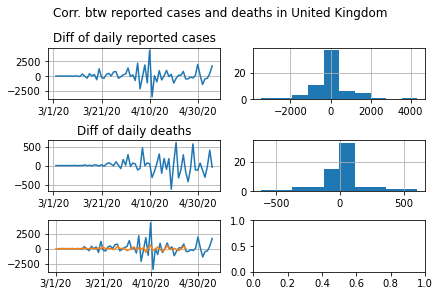

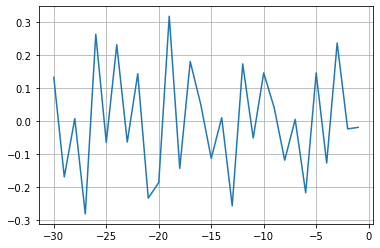

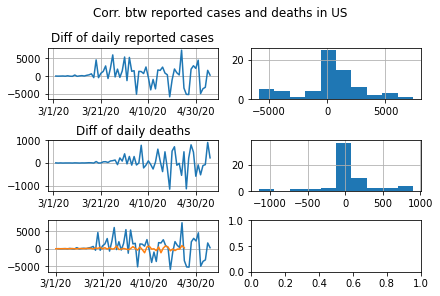

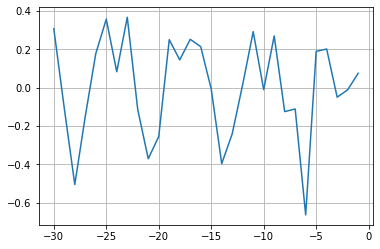

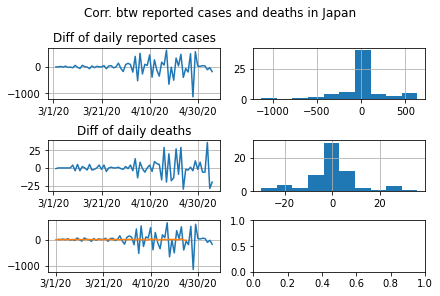

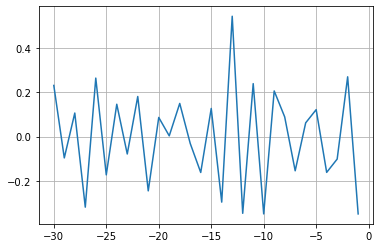

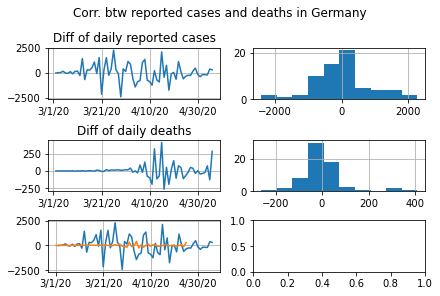

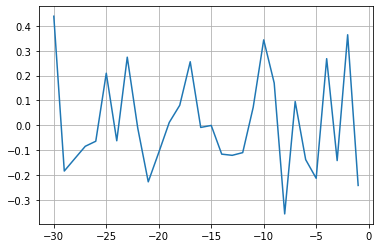

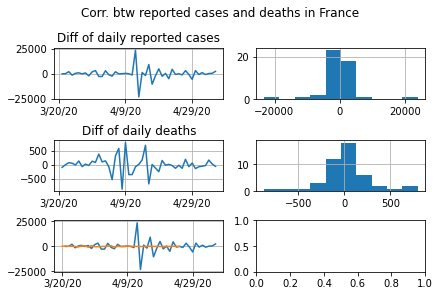

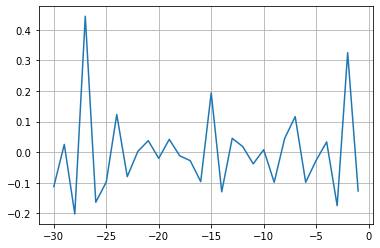

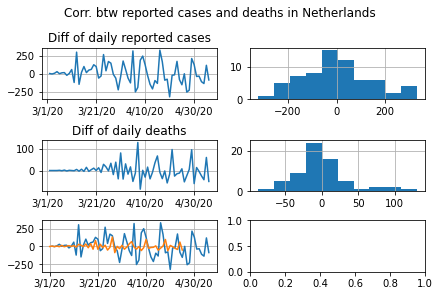

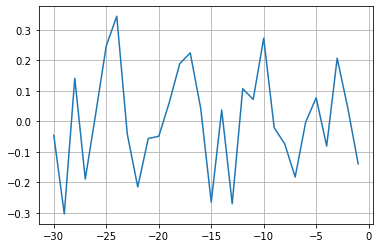

In [3]:
window = 1
date_to_cross_100_cases = "2/20/20"
date_to_cross_100_cases = "3/1/20"
country = "Japan"

def cases_vs_deaths(country, start_date):
    c = df_cases.loc[country].diff()[start_date:]
    d = df_deaths.loc[country].diff()[start_date:]
    #c = (c.pct_change() + 1.0).rolling(window, center=True).mean()[start_date:]
    #d = (d.pct_change() + 1.0).rolling(window, center=True).mean()[start_date:]
    c = c.diff()
    d = d.diff()

    fig, axs = plt.subplots(3, 2, constrained_layout=True)
    fig.suptitle("Corr. btw reported cases and deaths in {}".format(country))
    c.plot(ax=axs[0, 0], grid=True, title="Diff of daily reported cases")
    c.hist(ax=axs[0, 1])
    d.plot(ax=axs[1, 0], grid=True, title="Diff of daily deaths")
    d.hist(ax=axs[1, 1])


    c.plot(ax=axs[2, 0], grid=True)
    d.shift(-11).plot(ax=axs[2, 0], grid=True)
    plt.show()
    # df = pd.DataFrame([c,d.shift(-10)], index=["Cases", "Deaths"]).dropna(axis=1)
    # df.T.plot()

    maxlag = 30
    corr = np.zeros(maxlag)
    for lag in range(30):
        df = pd.DataFrame([c,d.shift(-lag)],index=["Cases", "Deaths"]).dropna(axis=1).T
        #df.plot(title="Lag = {}".format(lag))
        #plt.show()
        corr[lag] = df["Cases"].corr(df["Deaths"])

    plt.grid(which="both")
    plt.plot(np.arange(-maxlag, 0), corr)

cases_vs_deaths("Spain","3/10/20")
cases_vs_deaths("Italy","3/1/20")
cases_vs_deaths("United Kingdom","3/1/20")
cases_vs_deaths("US","3/1/20")
cases_vs_deaths("Japan","3/1/20")
cases_vs_deaths("Germany","3/1/20")
cases_vs_deaths("France","3/20/20")
cases_vs_deaths("Netherlands","3/1/20")

In [4]:
if 0:
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    df = pd.DataFrame({"Cases":c, "Deaths":d})
    fig, ax = plt.subplots(2, figsize=(10,6))
    ax[0] = plot_acf(df.Cases, ax=ax[0])
    ax[1] = plot_pacf(df.Deaths, ax=ax[1])

    df

## (Deprecated) Japanese daily increase rate of reported case by prefecture

Data source: Toyo Keizai Online

Thanks to [Kazuki Ogiwara](https://toyokeizai.net/list/author/%E8%8D%BB%E5%8E%9F+%E5%92%8C%E6%A8%B9) of Toyo Keizai Online ([GitHub](https://github.com/kaz-ogiwara/covid19/), [Dashboard](https://toyokeizai.net/sp/visual/tko/covid19/))

In [5]:
if 0:

    %matplotlib inline
    import pandas as pd
    import numpy as np

    import matplotlib as mpl
    import matplotlib.pyplot as plt
    font = {'family' : 'MS Gothic'}
    mpl.rc('font', **font)


    df = pd.read_csv('https://raw.githubusercontent.com/kaz-ogiwara/covid19/master/data/individuals.csv', 
                     parse_dates=[["確定年", "確定月", "確定日"]])
    print("len=", len(df))
    # display(df)
    # print(df.columns)
    df = df.drop(['新No.', '旧No.', '年代', '性別', '居住地2', '備考'], axis=1)

    # df.groupby("居住地").count()
    #df.groupby(["確定年", "確定月", "確定日"]).count()
    def get_data_by_pref(pref):  # 県ごとのデータを取得
        ts = df[df["居住地1"] == pref].groupby("確定年_確定月_確定日").count()
        ts.reset_index(inplace = True)
        # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
        ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地1" : pref})
        # ts = ts.set_index("確定日")
        return ts

    fig = plt.figure()
    window = 5
    pref_data = get_data_by_pref("東京都")

    for pref in ("愛知県", "北海道", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","新潟県"):
        pref_data = pref_data.merge(get_data_by_pref(pref), how='outer', sort=True)
        # print(pref_data.describe())
    # get_data_by_pref("東京都")
    pref_data = pref_data.set_index("確定日")
    last_date = pref_data.index[-1].date()

    title = "都道府県別感染者報告数拡大率({}日間の移動平均) {}".format(window, last_date)

    data_to_plot = np.exp(np.log(pref_data.loc["2020-03-1":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window, center=True).mean()).iloc[window:, :]
    data_to_plot.plot(title=title, ylim=[0.98, 1.2], grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
    # data_to_plot


# Japanese daily increase rate by prefecture

Data source: [Jag Japan](https://gis.jag-japan.com/covid19jp/)

C:\Users\hmaru\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


症例数= 15498


<Figure size 432x288 with 0 Axes>

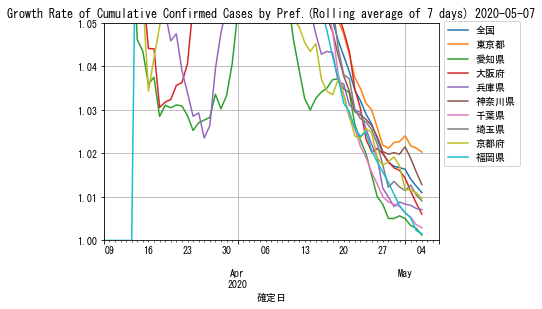

<Figure size 432x288 with 0 Axes>

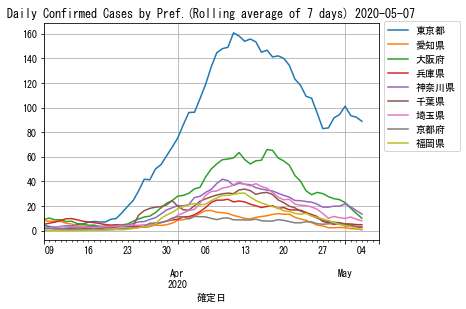

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)

fn = 'https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv'

def read_data():
    d = pd.read_csv(fn,usecols=["確定日", "受診都道府県"],parse_dates=["確定日"])
#    d = d.drop(["不明", "中部国際空港", "成田空港", "羽田空港", "関西国際空港"], errors='ignore') 
    d = d.dropna(how='all')
    print("症例数=", len(d))
    return d

def get_data_by_pref(df, pref):  # 県ごとのデータを取得
    ts = df[df["受診都道府県"] == pref].groupby("確定日").count()
    ts.reset_index(inplace = True)
    # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
    ts = ts.rename(columns={"受診都道府県" : pref})
    # ts = ts.set_index("確定日")
    return ts

df = read_data()
window = 7

# print(df.groupby("確定日").count().rename(columns={"受診都道府県" : "全国"}).reset_index())

pref_data = df.groupby("確定日").count().rename(columns={"受診都道府県" : "全国"}).reset_index()
# pref_data = get_data_by_pref(df, "東京都")
# print(pref_data)

for pref in ("東京都", "愛知県", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","福岡県"):
    d = get_data_by_pref(df, pref)
    pref_data = pref_data.merge(d, how='outer', sort=True)

# pref_data = get_data_by_pref(df, "東京都")

pref_data = pref_data.set_index("確定日")
last_date = pref_data.index[-1].date()

# display(pref_data)

fig = plt.figure()
title = "都道府県別累積感染者報告数拡大率({}日間の移動平均) {}".format(window, last_date)
title = "Growth Rate of Cumulative Confirmed Cases by Pref.(Rolling average of {} days) {}".format(window, last_date)

data_to_plot = np.exp(np.log(pref_data.loc["2020-03-01":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window, center=True).mean()).iloc[window:, :]
data_to_plot.plot(title=title, ylim=[1.0, 1.05], grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
# data_to_plot

fig = plt.figure()
title = "都道府県別感染者報告数({}日間の移動平均) {}".format(window, last_date)
title = "Daily Confirmed Cases by Pref.(Rolling average of {} days) {}".format(window, last_date)

data_to_plot = pref_data.loc["2020-03-01":,:].drop(columns=["全国"]).fillna(0).rolling(window, center=True).mean().iloc[window:, :]
data_to_plot.plot(title=title, grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')


## Projection of confirmed cases by different reproduction rates


last_date= 5/6/20
I0= 15253


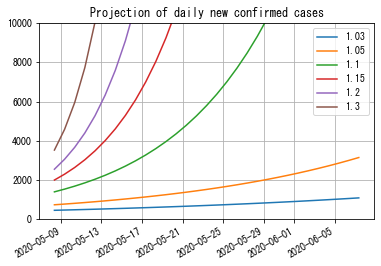

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

start_date = pd.Timestamp.today()
end_date = start_date + pd.Timedelta('30 Days')
# print(country_df)
last_date = df_cases.columns[-1]
print("last_date=", last_date)
# display(country_df)
I0 = df_cases.loc["Japan",last_date]
print("I0=", I0)
reproduction_rates = np.array([1.03, 1.05, 1.1, 1.15, 1.2, 1.3])

dates = pd.date_range(start_date, end_date)
c = np.zeros((len(dates), len(reproduction_rates)))
for i in range(len(reproduction_rates)):
    c[:,i] = reproduction_rates[i] ** (np.arange(len(dates)) - 1) * I0 * (reproduction_rates[i] - 1)


sim = pd.DataFrame(c, index=dates, columns=reproduction_rates)
title="Projection of daily new confirmed cases"
sim.plot(ylim=[0, 10000], title=title, grid=True)


# Reporting Delay from Onset
Data source: [Jag Japan](https://gis.jag-japan.com/covid19jp/)

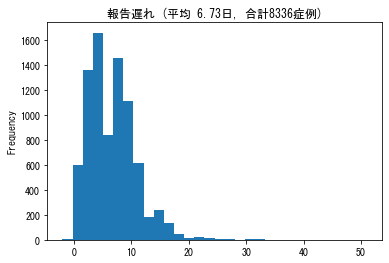

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)
fn = 'https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv'
# fn = 'data/JAG_Japan/COVID-19.csv'

def read_data():
    d = pd.read_csv(fn,usecols=["確定日", "発症日", "受診都道府県"],parse_dates=["確定日", "発症日"], low_memory=False)
    d = d.drop(["不明", "中部国際空港", "成田空港", "羽田空港", "関西国際空港"], errors='ignore')
    return d

df = read_data()
# h = df["発症日"]
#for i in range(len(h)):
#    print(i, h[i])
#    x = pd.to_datetime(h[i])
df["報告遅れ"] = (df["確定日"] - df["発症日"]).dt.days
df = df.dropna()
df = df.set_index("確定日")
onset_known = len(df)
m = df["報告遅れ"].mean()
title = "報告遅れ (平均 {:.2f}日, 合計{}症例)".format(m, onset_known)
# df.hist(bins=30)
df["報告遅れ"].plot(kind='hist', bins=30, title=title)
# df["報告遅れ"].plot(kind="box")

# Correlation btw N calls at call center and daily reported cases

Data source: [Tokyo Metropolitan Governmnet Open Data Catalogue Site](https://portal.data.metro.tokyo.lg.jp/) [ダッシュボード](https://stopcovid19.metro.tokyo.lg.jp/)

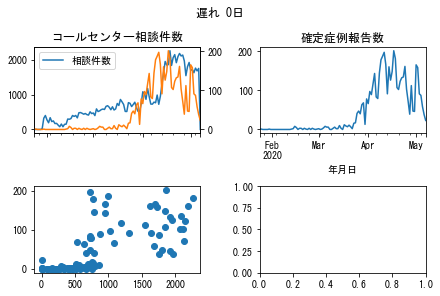

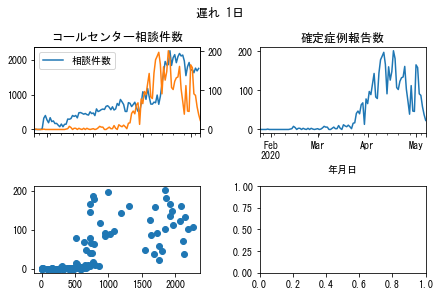

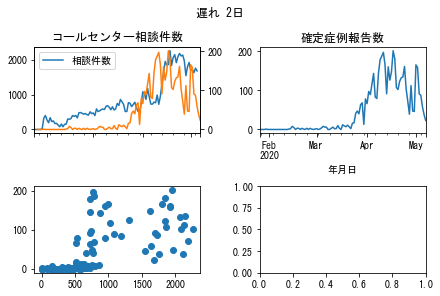

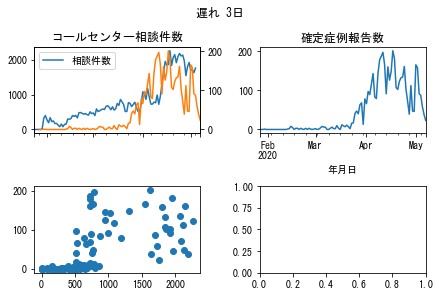

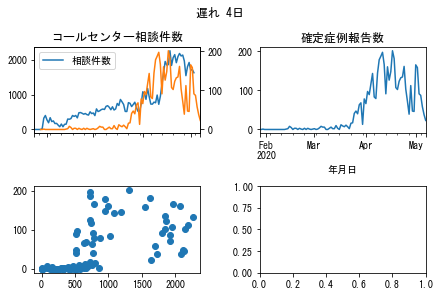

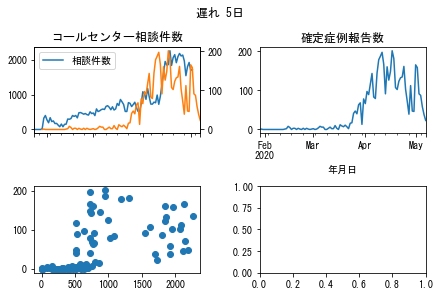

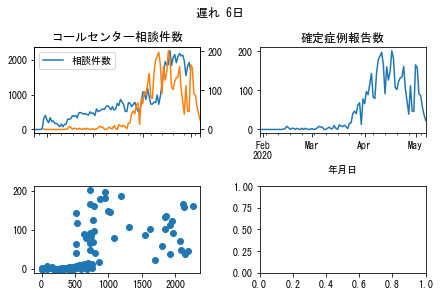

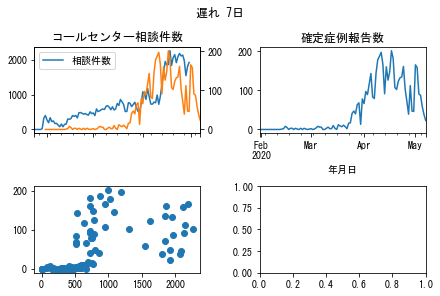

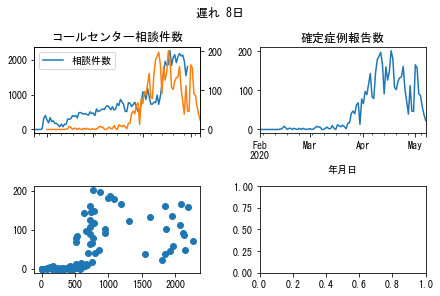

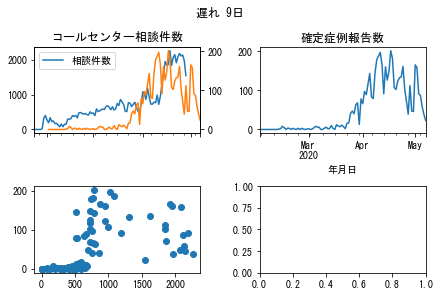

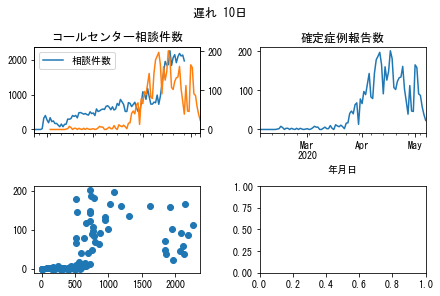

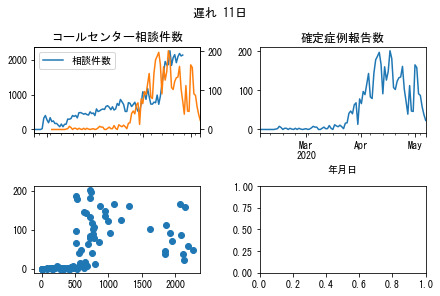

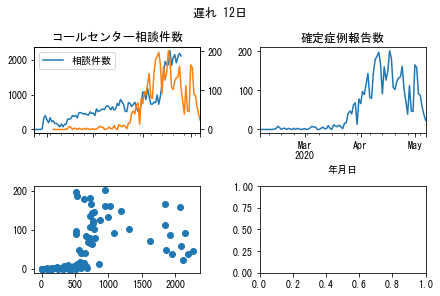

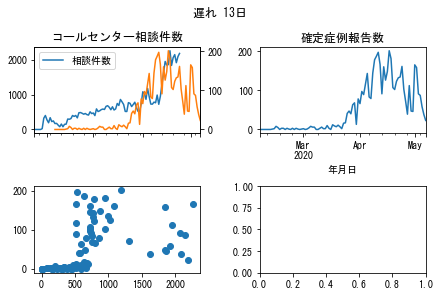

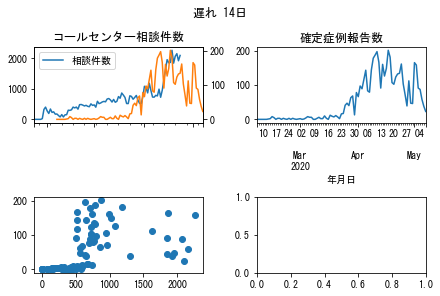

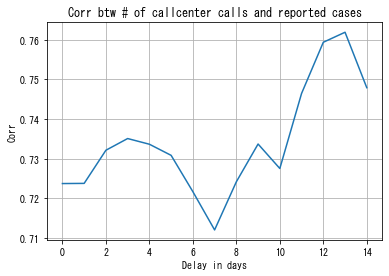

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)

daily_confirmed_cases = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv',
                    usecols=["公表_年月日", "患者_年代", "患者_性別"],
                    parse_dates=["公表_年月日"]) \
    .groupby("公表_年月日") \
    .count().drop(columns=["患者_年代"]) \
    .reset_index() \
    .rename(columns={"患者_性別": "確定症例報告数", "公表_年月日": "年月日"})


daily_calls = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_call_center.csv',
                    usecols=["受付_年月日", "相談件数"],
                    parse_dates=["受付_年月日"]) \
    .rename(columns={"受付_年月日":"年月日"})
daily_calls
df = daily_confirmed_cases.merge(daily_calls, how='outer', sort=True).set_index("年月日")
df = df.asfreq('D').fillna(0)
#plt.title("コールセンター相談件数")
#df["相談件数"].plot()
#plt.show()
#plt.title("確定症例数報告数")
#df["確定症例報告数"].plot()
#plt.show()

w = 15  # 何日までのずれをとるか
corr = np.zeros(w)
for d in range(0, w):
    if d==0:
        n_calls = df["相談件数"]
    else:
        n_calls = df["相談件数"][:-d]
    n_reported = df["確定症例報告数"][d:]
    corr[d] = n_calls.corr(n_reported)
    fig, axs = plt.subplots(2, 2, constrained_layout=True)
    fig.suptitle("遅れ {}日".format(d))
    l1 = n_calls.plot(ax=axs[0, 0], label="相談件数")
    l2 = n_reported.plot(ax=axs[0,0], label="確定症例数", secondary_y=True)
    axs[0,0].legend(loc="upper left")
    axs[0,0].set_title("コールセンター相談件数")
    n_reported.plot(ax=axs[0, 1])
    axs[0,1].set_title("確定症例報告数")
    axs[1, 0].scatter(n_calls, n_reported)
    # df[["相談件数", "確定症例報告数"]].plot(ax=axs[1,1], secondary_y=True)
    plt.show()
    # print(d, len(n_calls), len(n_reported), corr[d])

plt.grid()
plt.title("コールセンター相談件数と確定症例数の相関係数")
plt.title("Corr btw # of callcenter calls and reported cases")
plt.xlabel("遅れ日数")
plt.ylabel("相関係数")
plt.xlabel("Delay in days")
plt.ylabel("Corr")
plt.plot(np.array(range(0, w)), corr)


# Simulation on High Variability of R

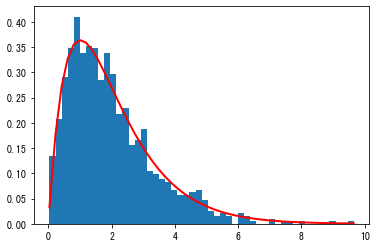

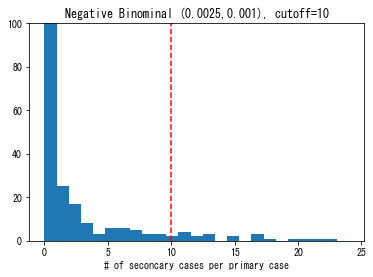

Original mean= 1.6453
Cutoff mean =  0.0247
Max s =  1887


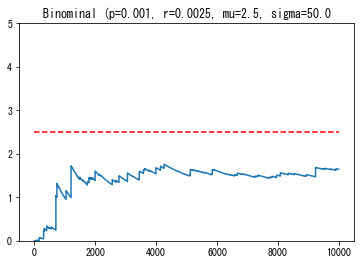

Sample mean= 1.6453
Sample sigma= 29.804541397411235


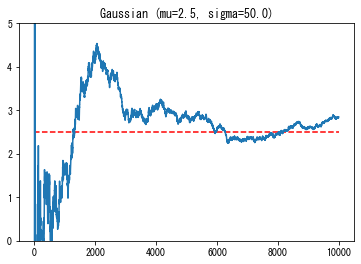

Sample mean= 2.847821107214597
Sample sigma= 49.54934344193914


In [10]:
shape, scale = 2., 1.01  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

import matplotlib.pyplot as plt
import scipy.special as sps
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                      (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

n = 10000
p, mean, cutoff = 0.001, 2.5, 10
r = p * mean
sigma = np.sqrt(r * (1-p) / (p * p))
s = np.random.negative_binomial(p*mean, p, n)
title = "Negative Binominal ({},{}), cutoff={}".format(p*mean, p, cutoff)
plt.title(title)
plt.xlabel('# of seconcary cases per primary case')
plt.vlines([cutoff], 0, np.max(n * .75), "red", linestyles='dashed')
plt.hist(s, range=(0,24), bins=25)
plt.ylim([0, 100])
plt.show()
print("Original mean=", np.mean(s))
print("Cutoff mean = ", np.mean(np.where(s>=cutoff, 0, s)))
print("Max s = ", np.max(s))
plt.rcParams['figure.figsize']

def plot_means(s, mu, title=""):
    n = len(s)
    means = np.zeros(n-1)
    for i in range(n-1):
        means[i] = np.mean(s[0:i+1])
    plt.title(title)
    plt.ylim([0,5])
    plt.plot(range(n-1), means)
    plt.hlines([mu], 0, n, "red", linestyles="dashed")
    plt.show()
    print("Sample mean=", np.mean(s))
    print("Sample sigma=", np.std(s))
    
plot_means(s, mean, title="Binominal (p={}, r={}, mu={:.1f}, sigma={:.1f}".format(p, r, mean, sigma))
#sigma = 10
s = np.random.normal(mean, sigma, n)
plot_means(s, mean, title="Gaussian (mu={:.1f}, sigma={:.1f})".format(mean, sigma))

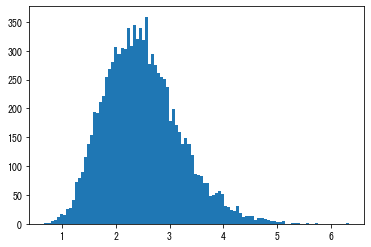

Ave. of menas= 2.49228936
Std of means= 0.7024666913603735
[2.73808172 2.40374072 1.93799841 ... 3.21057518 2.66094105 2.31691907]


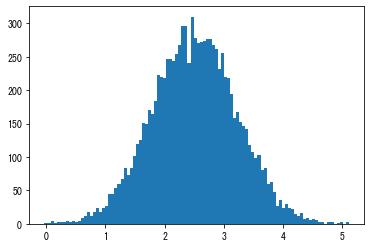

Ave. of menas= 2.5021629286595903
Std of means= 0.711581728644217


In [11]:
n = 5000
trials = 10000
p, mean, cutoff = 0.001, 2.5, 10
r = p * mean
sigma = np.sqrt(r * (1-0) / (p * p))

# Overdispersed distribution
s = np.random.negative_binomial(p*mean, p, (trials, n))
means = np.mean(s, axis=1)
plt.hist(means, bins=100)
plt.show()
print("Ave. of menas=", np.mean(means))
print("Std of means=", np.std(means))

# Gaussian distribution
s = np.random.normal(mean, sigma, (trials, n))
means = np.mean(s, axis=1)
print(means)
plt.hist(means, bins=100)
plt.show()
print("Ave. of menas=", np.mean(means))
print("Std of means=", np.std(means))


In [12]:
a = 0.5
s = np.random.power(a, 100)
print("Sample mean=", np.mean(s))
print("Sample sigma=", np.std(s))

s

Sample mean= 0.36396726311303884
Sample sigma= 0.3085374621482759


array([5.73309356e-04, 2.28016599e-02, 3.10057240e-01, 7.06135956e-01,
       1.39903615e-02, 1.85138610e-02, 1.11829715e-01, 1.51746219e-01,
       9.71476725e-01, 2.71708559e-01, 6.83688136e-01, 1.25185641e-03,
       2.30960079e-01, 5.60262805e-04, 6.02369007e-01, 8.67538897e-01,
       4.63262852e-01, 1.27657610e-02, 7.11503456e-01, 6.49583307e-01,
       1.05937337e-01, 9.65279728e-01, 2.68260618e-01, 8.17009622e-01,
       8.50353769e-02, 9.00013608e-01, 1.05194780e-02, 2.03204307e-01,
       1.96597460e-01, 4.08388155e-01, 3.07881568e-01, 5.56590037e-03,
       1.37653355e-01, 6.92207096e-01, 7.07879883e-01, 5.09976453e-01,
       6.21508622e-02, 2.12322176e-01, 7.78676397e-01, 1.81148730e-02,
       1.79144471e-03, 5.28165327e-02, 6.90463771e-01, 4.41631775e-02,
       9.47059395e-01, 1.58750810e-01, 7.59607446e-04, 3.71833140e-01,
       1.12303172e-02, 2.29043922e-01, 1.28063929e-01, 4.72862244e-01,
       4.56416185e-01, 4.75540169e-01, 1.34331298e-03, 2.76607591e-01,
      

### Learn how Granger causality works

C:\Users\hmaru\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


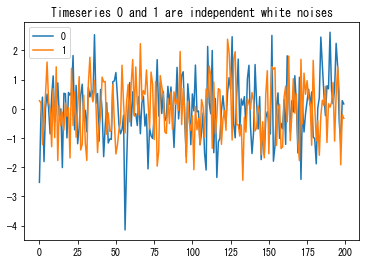

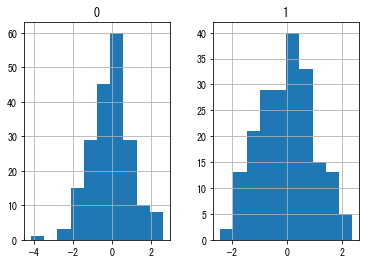

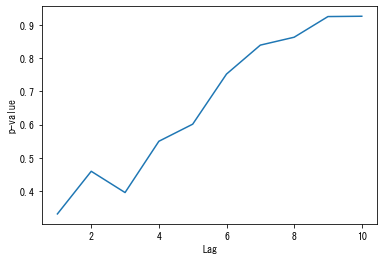

In [13]:
# ２つの白色ガウス雑音には、Granger Causalityはない
# すべてのlagにおいて、p > α (=5%)

import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests


t_max = 200
white_noise_1 = np.random.normal(0.0, 1.0, t_max)
white_noise_2 = np.random.normal(0.0, 1.0, t_max)
df1 = pd.DataFrame([white_noise_1, white_noise_2]).T
df1.plot()
plt.title("Timeseries 0 and 1 are independent white noises")
plt.show()
df1.hist()
plt.show()

gc_res = grangercausalitytests(df1, 10, verbose=False)
p_values = np.array([v[0]['ssr_ftest'][1] for v in gc_res.values()])
plt.plot(np.arange(len(p_values)) + 1, p_values)
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.show()

,x1,x2
0,0.774999,-1.056103
1,-0.023315,-0.181822
2,-1.378766,-1.003100
3,-0.501107,1.893903
4,0.532335,0.067480
...,...,...
195,0.487865,0.900458
196,-1.584238,0.867775
197,-0.664389,0.008567
198,0.971570,1.805455


[2.72467492 2.6591936 ] [0.25606154 0.26458392]


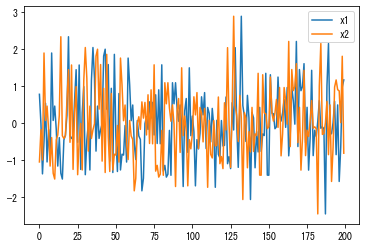

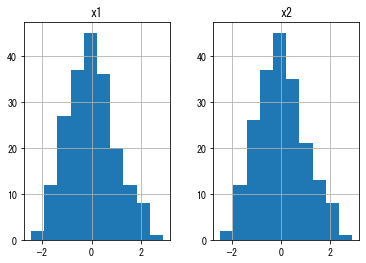

H0: x1 is sampled from a Gaussian distribution.
H0 cannot be rejected. p=0.2560615430002709
H0: x2 is sampled from a Gaussian distribution.
H0 cannot be rejected. p=0.26458392062426767


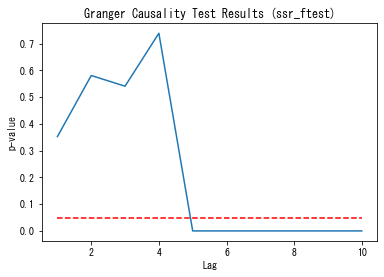

In [14]:
# 時系列２は、時系列１をlagだけずらしたもの
# lagより先は、p=0.0 になる

import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import stats

t_max = 200
lag = 5
lag_max = 10
white_noise_1 = np.random.normal(0.0, 1.0, t_max)
white_noise_2 = np.random.normal(0.0, 1.0, t_max)
white_noise_2[:-lag] = white_noise_1[lag:]
df1 = pd.DataFrame(zip(white_noise_1, white_noise_2), columns=["x1", "x2"])
display(df1)

alpha = 0.01
stat, p = stats.normaltest(df1)
print(stat, p)
# print('Statistics=%.3f, p=%.3f' % (stat, p))

def check_normality(ts, label="ts", verbose=False):
    # 帰無仮説： tsはガウス分布からのサンプル
    stat, p = stats.normaltest(ts)
    if verbose:
        print("H0: {} is sampled from a Gaussian distribution.".format(label))
    if p < alpha:
        # 棄却： ガウス分布からのサンプルとは言えない
        if verbose:
            print("H0 rejected, p={}".format(p))
        return False
    else:
        # 「ガウス分布でない」とは言えない
        if verbose:
            print("H0 cannot be rejected. p={}".format(p))
        return True

def plot_granger_causality(df, lag_max=50, verbose=False, title="Granger Causality Test Results (ssr_ftest)"):
    if verbose:
        display(df)
    df.plot()
    plt.show()
    df.hist()
    plt.show()

    # Check normality of the two timeseries
    if not check_normality(df["x1"], label="x1", verbose=True):
        return
    if not check_normality(df["x2"], label="x2", verbose=True):
        return
    # plt.title("Timeseries 0 is copying timeseries 1 with lag = {}".format(lag))
    # plt.title("Distribution of each timeseries")
    gc_res = grangercausalitytests(df, lag_max, verbose=verbose)

    p_values = np.array([v[0]['ssr_ftest'][1] for v in gc_res.values()])
    plt.plot(np.arange(1, lag_max + 1), p_values)
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("p-value")
    plt.hlines(0.05, 1, lag_max, "red", linestyles='dashed')
    plt.show()
    
plot_granger_causality(df1, lag_max=lag_max)

,x1,x2
0,0.004573,0.000000
1,0.069040,0.000000
2,-0.031242,0.000000
3,0.112018,0.000000
4,-0.067056,0.000000
...,...,...
60,0.176485,-0.519037
61,0.144251,-0.519037
62,-0.375065,3.114220
63,-0.092127,-2.508677


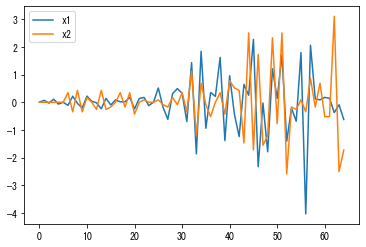

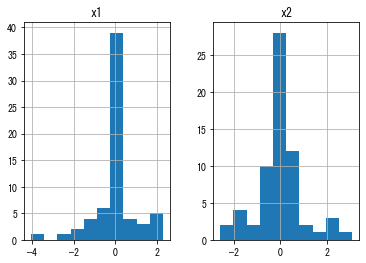

H0: x1 is sampled from a Gaussian distribution.
H0 rejected, p=0.00012715582882810272


In [15]:
# Granger causality test
# To see if daily number of reported cases has a signal for predicting future number of deaths
# Reported cases has predictivity with lag in [8, 13]

from sklearn import preprocessing
from statsmodels.tsa.stattools import grangercausalitytests
country = "Japan"
start_date = "3/1/20"

def prep_timeseries(ts):
    # display(ts)
    # ts = (ts + 1).pct_change()
    ts = ts.diff()
    ts = ts.diff()
    return preprocessing.scale(ts[2:])



# 最初の差分は、日次報告数、次の差分は日時報告数の変化分、これを μ=0, σ=1.0に正規化
# c = preprocessing.scale(df_cases.T[country].diff().diff())
# d = preprocessing.scale(df_deaths.T[country].diff().diff())
x1 = prep_timeseries(df_cases.T[country][start_date:])
x2 = prep_timeseries(df_deaths.T[country][start_date:])

# df_deaths
df = pd.DataFrame([x1,x2], index=["x1", "x2"]).T
plot_granger_causality(df, lag_max=17, verbose=True, title="Granger causality test (# cases -> # deaths)")

,realgdp,realcons
1,0.025256,0.015404
2,-0.001192,0.010440
3,0.003501,0.001085
4,0.022438,0.009580
5,-0.004674,0.012652
...,...,...
198,-0.006758,-0.008908
199,-0.013710,-0.007812
200,-0.016475,0.001512
201,-0.001850,-0.002193


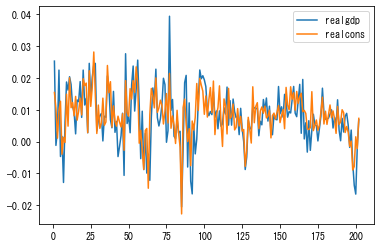

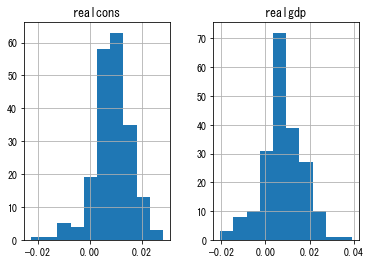


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
data = sm.datasets.macrodata.load_pandas().data
data_sel = data[['realgdp', 'realcons']].pct_change().dropna()
display(data_sel)
data_sel.plot()
plt.show()
data_sel.hist()
plt.show()
gc_res = grangercausalitytests(data_sel, 10)